<p align="center">
<a href="https://tephi.readthedocs.io/en/latest/">
    <img src="https://scitools.github.io/tephi/tephi-logo-200-137.png" alt="Tephi">
</a>
</p>
<p style="text-align: center; font-weight: bold; font-size: 20px;">
    Tephigram plotting in Python
</p>
<hr>

This notebook provides a few simple worked examples showing you how to use the `tephi` Python package to easily plot your metorological data on a tephigram.

For further details, please refer to the [Tephi documentation](https://tephi.readthedocs.io/en/latest/index.html).

### Import packages

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import os
import tephi
from tephi import Tephigram

### Load `tephi` sample data

Let's load some pre-define `tephi` sample data to plot on our tephigrams.

First, let's load some `tephi` sample **dew point temperature** and **dry bulb temperature** data...

In [3]:
fname_dewpoint = os.path.join(tephi.DATA_DIR, "dews.txt")
fname_drybulb = os.path.join(tephi.DATA_DIR, "temps.txt")

column_titles = [("pressure", "dewpoint"),
                 ("pressure", "temperature")]

data_dewpoint, data_drybulb = tephi.loadtxt(fname_dewpoint, fname_drybulb, column_titles=column_titles)

dewpoint = zip(data_dewpoint.pressure, data_dewpoint.dewpoint))
drybulb = zip(data_drybulb.pressure, data_drybulb.temperature))

Also, let's load some `tephi` sample **wind barb** data...

In [4]:
fname_barbs = os.path.join(tephi.DATA_DIR, "barbs.txt")

column_titles = [("pressure", "dewpoint", "wind_speed", "wind_direction")]

data_barbs = tephi.loadtxt(fname_barbs, column_titles=column_titles)

barbs = zip(data_barbs.wind_speed, data_barbs.wind_direction, data_barbs.pressure))

### Plot `tephi` sample data

Now let's plot our **dew point temperature** and **dry bulb temperature** data...

<IPython.core.display.Javascript object>


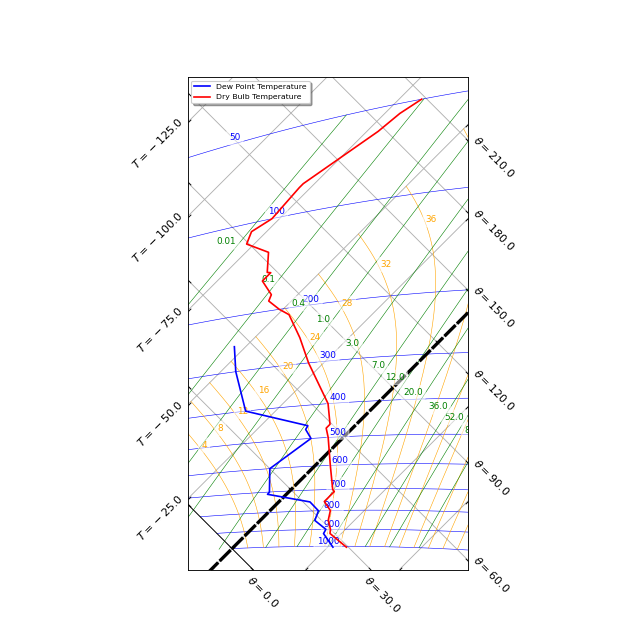

In [5]:
figure = plt.figure(figsize=(8, 8))

tephigram = Tephigram(figure=figure)
tephigram.plot(dewpoint, label="Dew Point Temperature", color="blue")
tephigram.plot(drybulb, label="Dry Bulb Temperature", color="red")

And finally, let's plot our **wind barb** data and associate it with the **dew point temperature** data...

<IPython.core.display.Javascript object>


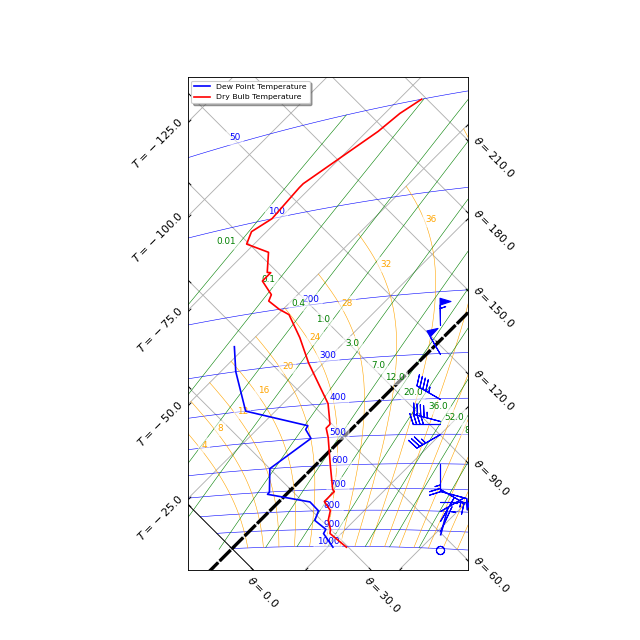

In [6]:
figure = plt.figure(figsize=(8, 8))

tephigram = Tephigram(figure=figure)
profile = tephigram.plot(dewpoint, label="Dew Point Temperature", color="blue")
profile.barbs(barbs)
tephigram.plot(drybulb, label="Dry Bulb Temperature", color="red")

Note that, you can easily associated the sample **wind barb** data with the **dry bulb temperature** data instead... 

<IPython.core.display.Javascript object>


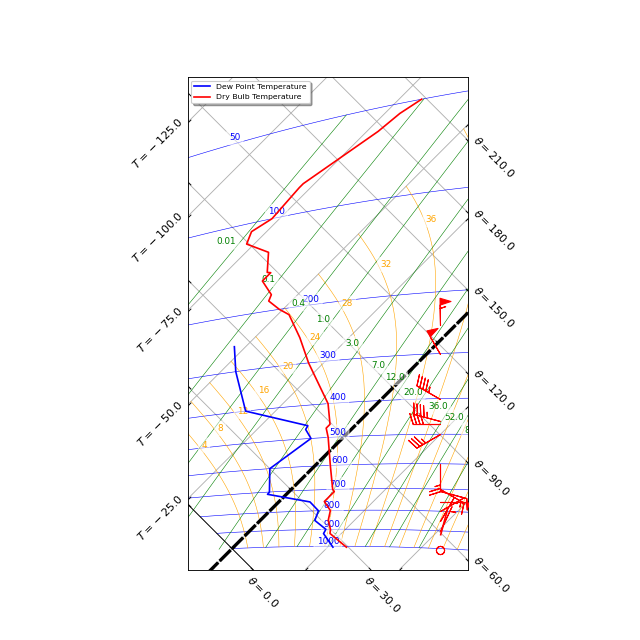

In [7]:
figure = plt.figure(figsize=(8, 8))

tephigram = Tephigram(figure=figure)
tephigram.plot(dewpoint, label="Dew Point Temperature", color="blue")
profile = tephigram.plot(drybulb, label="Dry Bulb Temperature", color="red")
profile.barbs(barbs)

### Anchoring a `tephi` plot

By default, `tephi` will automatically center the plot around all rendered temperature profiles. This behaviour may not be desirable, particularly when comparing several separate tephigram plots against one another e.g., for a time-series for a specific observation point-of-interest.

To fix the extent of a plot, simply specify an `anchor` point to `tephi`. 

An `anchor` point is a sequence of two `(pressure, temperature)` pairs that specify the **bottom left-hand corner** and the **top right-hand corner** of the plot. The pressure data points must be in units of mb or hPa, and the temperature data points must be in units of <sup>o</sup>C, e.g.,

<IPython.core.display.Javascript object>


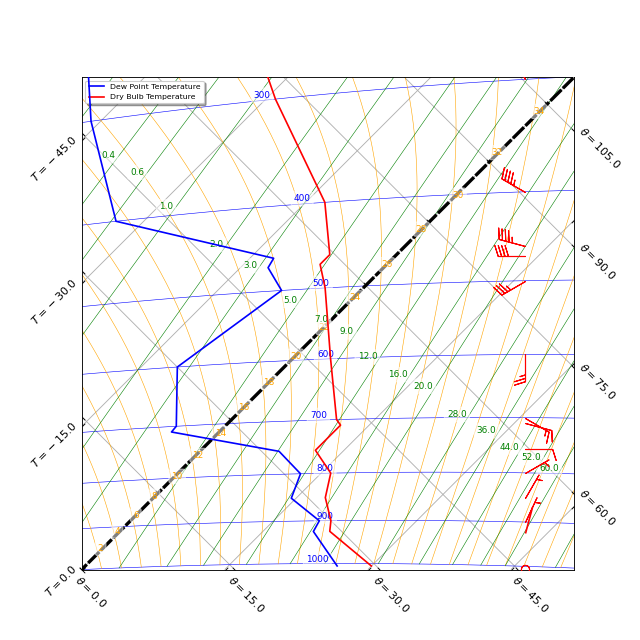

In [8]:
anchor = [(1000, 0), (300, 0)]

figure = plt.figure(figsize=(8, 8))

tephigram = Tephigram(figure=figure, anchor=anchor)
tephigram.plot(dewpoint, label="Dew Point Temperature", color="blue")
profile = tephigram.plot(drybulb, label="Dry Bulb Temperature", color="red")
profile.barbs(barbs)